## Описание данных
Вам представлены данные о доходах сотрудников участка горячего проката за год, в том числе данные, описывающие специфику рабочих мест.

## Задание

•	Выявите тип и формулу зависимости оклада, премии и доплат от приведенных в таблице данных

•	Выявите все возможные зависимости между размерами оклада, премии и доплат


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [66]:
data = pd.read_excel('database.xlsx')
data.head()

,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,2009-01-01,Нагревальщик металла,7,Нагревательные печи,22,580,26020.0
1,2009-01-01,Нагревальщик металла,6,Нагревательные печи,22,580,22980.0
2,2009-01-01,Нагревальщик металла,5,"Нагревательные печи, нагрев",22,580,20350.0
3,2009-01-01,Нагревальщик металла,5,"Нагревательные печи, кантовка",22,580,20350.0
4,2009-01-01,Нагревальщик металла,4,Нагревательные печи,22,580,18090.0


In [67]:
# переименовываем столбцы для удобства доступа
data = data.rename(columns={'Месяц': 'month', 'Профессия': 'prof', 'Разряд': 'qual', 'Оборудование': 'equip', 'Вредность (балл.)': 'harm', 
                    'Объем производства': 'volume', 'Доход': 'salary'})

Исходя из предположения, что зарплата складывается из базого оклада для разряда + доплаты за вредность + премии за выполненный объем , посмотрим на таблицу, отражающую категории вредности для профессий

In [68]:
data.pivot_table(index='prof', columns='harm', aggfunc='count', 
                 values='month', fill_value=0).reset_index()

harm,prof,0,8,11,16,18,22
0,Вальцовщик,0,0,0,0,60,0
1,Контролер качества готовой продукции,12,0,0,0,0,0
2,Нагревальщик металла,0,0,0,0,0,60
3,Огнеупорщик,0,0,12,0,0,0
4,Оператор поста управления,0,36,0,0,0,0
5,Подручный вальцовщика,0,0,0,0,36,0
6,Посадчик металла,0,0,0,0,0,12
7,Резчик горячего металла,0,0,0,12,0,0
8,Уборщик,12,0,0,0,12,0


Видим, что у каждой профессия своя вредность за исключением специализации "Уборщик", она подразделяются на две категории

In [7]:
# Проверяем кол-во категорий разрядов внутри профессии
data[data.prof == 'Уборщик'].qual.unique()

array([3], dtype=int64)

У профессии "Уборщик" всего один разряд . Посмотрим на разницу дохода при фиксированном объеме и разных показателях вредности

In [8]:
data_cleaner = data[data.prof == 'Уборщик'].pivot_table(index='volume', columns='harm', 
                 values='salary', fill_value=0).reset_index()
data_cleaner

harm,volume,0,18
0,580,12180.000000,15420.000000
1,780,12180.000000,15420.000000
2,790,12180.000000,15420.000000
3,810,12180.000000,15420.000000
4,820,12180.000000,15420.000000
5,950,12896.470588,16136.470588
6,1020,13398.000000,16638.000000
7,1080,13827.882353,17067.882353
8,1180,14544.352941,17784.352941
9,1200,14687.647059,17927.647059


Вычтем из столбца с показателем вредности 18 столбец с показателем 0, тогда получим графу доплаты

In [46]:
data_cleaner['harm_fare'] = data_cleaner[18] - data_cleaner[0]

In [48]:
# разделим на единицы вредности, чтобы получить доплату за единицу
data_cleaner['harm_fare_per_unit'] = (data_cleaner[18] - data_cleaner[0]) / 18

In [49]:
data_cleaner

harm,volume,0,18,harm_fare,harm_fare_per_unit
0,580,12180.000000,15420.000000,3240.0,180.0
1,780,12180.000000,15420.000000,3240.0,180.0
2,790,12180.000000,15420.000000,3240.0,180.0
3,810,12180.000000,15420.000000,3240.0,180.0
4,820,12180.000000,15420.000000,3240.0,180.0
5,950,12896.470588,16136.470588,3240.0,180.0
6,1020,13398.000000,16638.000000,3240.0,180.0
7,1080,13827.882353,17067.882353,3240.0,180.0
8,1180,14544.352941,17784.352941,3240.0,180.0
9,1200,14687.647059,17927.647059,3240.0,180.0


In [12]:
data_cleaner.harm_fare_per_unit.unique()

array([180., 180., 180.])

Доплата за вредность профессии равняется 180 рублей за единицу вредности

In [13]:
data['sal_out_harm'] = data.salary - data.harm * 18

Проверим влияние оборудования на доход по профессии

In [15]:
data.groupby(['prof', 'qual', 'equip']).agg({'salary': 'mean', 'harm': 'mean'})

salary  \
prof                                 qual equip                                               
Вальцовщик                           5    Калибровочный стан                   21341.308824   
                                     6    Пилигримовые станы                   24245.911765   
                                          Прошивной стан                       24245.911765   
                                     7    Пилигримовые станы                   27603.323529   
                                          Прошивной стан                       27603.323529   
Контролер качества готовой продукции 7    Контрольно-измерительная аппаратура  24363.323529   
Нагревальщик металла                 4    Нагревательные печи                  19565.338235   
                                     5    Нагревательные печи, кантовка        22061.308824   
                                          Нагревательные печи, нагрев          22061.308824   
                                     6    Нагревательные печи                  24965.911765   
                                     7    Нагревательные печи                  28323.323529   
Огнеупорщик                          4    Нагревательные печи                  17585.338235   
Оператор поста управления            4    Калибровочный стан                   17045.338235   
                                     5    Калибровочный стан                   19541.308824   
                                          Калибровочный стан, ГРП              19541.308824   
Подручный вальцовщика                3    Пилигримовые станы                   16691.735294   
                                     4    Пилигримовые станы                   18845.338235   
                                          Прошивной стан                       18845.338235   
Посадчик металла                     4    Нагревательные печи                  19565.338235   
Резчик горячего металла              4    Пилигримовые станы                   18485.338235   
Уборщик                              3    Вспомогательные помещения            13451.735294   
                                          Пилигримовые станы                   16691.735294   

                                                                               harm  
prof                                 qual equip                                      
Вальцовщик                           5    Калибровочный стан                     18  
                                     6    Пилигримовые станы                     18  
                                          Прошивной стан                         18  
                                     7    Пилигримовые станы                     18  
                                          Прошивной стан                         18  
Контролер качества готовой продукции 7    Контрольно-измерительная аппаратура     0  
Нагревальщик металла                 4    Нагревательные печи                    22  
                                     5    Нагревательные печи, кантовка          22  
                                          Нагревательные печи, нагрев            22  
                                     6    Нагревательные печи                    22  
                                     7    Нагревательные печи                    22  
Огнеупорщик                          4    Нагревательные печи                    11  
Оператор поста управления            4    Калибровочный стан                      8  
                                     5    Калибровочный стан                      8  
                                          Калибровочный стан, ГРП                 8  
Подручный вальцовщика                3    Пилигримовые станы                     18  
                                     4    Пилигримовые станы                     18  
                                          Прошивной стан                         18  
Посадчик металла                     4    Нагревательные печи                    22 

В рамках одной квалификации средняя зарплата не меняется в зависимости от оборудования, кроме уборщиков, у которых уборка различных типов оборудования влияет на вредность работы


Остается рассмотреть два фактора: квалификацию специалиста и объем производства, начнем с объема:

In [50]:
# распределение зарплат по объему
vol_data = data.pivot_table(index='qual', columns='volume', 
                 values='salary', fill_value=0).reset_index()
vol_data

volume,qual,580,780,790,810,820,950,1020,1080,1180,1200,1250,1400
0,3,14340.000000,14340.000000,14340.000000,14340.000000,14340.000000,15056.470588,15558.000000,15987.882353,16704.352941,16847.647059,17205.882353,18280.588235
1,4,17087.142857,17087.142857,17087.142857,17087.142857,17087.142857,17918.319328,18500.142857,18998.848739,19830.025210,19996.260504,20411.848739,21658.613445
2,5,19198.000000,19198.000000,19198.000000,19198.000000,19198.000000,20162.117647,20837.000000,21415.470588,22379.588235,22572.411765,23054.470588,24500.647059
3,6,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,23618.823529,24402.000000,25073.294118,26192.117647,26415.882353,26975.294118,28653.529412
4,7,24670.000000,24670.000000,24670.000000,24670.000000,24670.000000,25967.647059,26876.000000,27654.588235,28952.235294,29211.764706,29860.588235,31807.058824


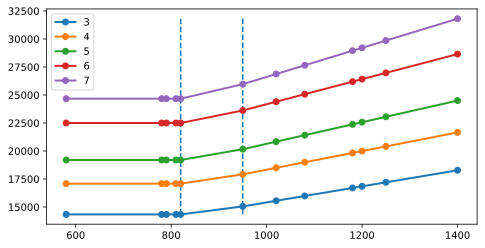

In [51]:
# отрисуем график для наглядности
fig = plt.figure(figsize=(6,3))
x = vol_data.drop('qual', axis=1)[0:1].columns.to_numpy()
for i in range(vol_data.shape[0]):
    y = vol_data.drop('qual', axis=1)[i: i+1].values.reshape((12,))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(x, y, label=str(vol_data.qual[i]), linewidth=2.00, marker='o')
ax.vlines(820, vol_data.drop('qual', axis=1).min().min(), y.max(), linestyle='--')
ax.vlines(950,  vol_data.drop('qual', axis=1).min().min(), y.max(), linestyle='--')
ax.legend()
plt.show()

Имеем кусочно-линейную функцию. При объеме до 820 единиц премия за результаты не начисляется, далее выплаты возрастают с одним коэффициентом с объемом до 950, и от 950 с немного бОльшим коэффициентом, причем, для каждой квалификации свой коэффициент, что видно из непараллельности наклонных прямых. То есть, можно сказать, что есть две премии с двумя коэффициентами премирования, нормированными по порогам. Просчитаем эти коэффициенты по категориям:

In [52]:
# производная для прямой по двум точкам
def find_k(x1, x2, y1, y2):
    return (y2 - y1) / (x2 - x1)

In [63]:
for q in vol_data.qual:
    row = vol_data[vol_data.qual == q]
    print('Коэффициент k1 для разряда', q, ':', find_k(row[820].name, row[950].name, int(row[820]), int(row[950])))

Коэффициент k1 для разряда 3 : 5.507692307692308
Коэффициент k1 для разряда 4 : 6.392307692307693
Коэффициент k1 для разряда 5 : 7.415384615384616
Коэффициент k1 для разряда 6 : 8.6
Коэффициент k1 для разряда 7 : 9.976923076923077


In [64]:
for q in vol_data.qual:
    row = vol_data[vol_data.qual == q]
    print('Коэффициент k2 для разряда', q, ':', find_k(row[950].name, row[1020].name, int(row[950]), int(row[1020])))

Коэффициент k2 для разряда 3 : 7.171428571428572
Коэффициент k2 для разряда 4 : 8.314285714285715
Коэффициент k2 для разряда 5 : 9.642857142857142
Коэффициент k2 для разряда 6 : 11.2
Коэффициент k2 для разряда 7 : 12.985714285714286


## Как итог, получаем следующую зависимость: 
Обозначим переменные:

•	 базовый оклад для профессии и категории за Base

•	 доплаты за вредность за Harm

•	 выполненный объем работ после первого порога премирования (принимает значения от 0 до 130, что есть разница между 950 и 820) за V1

•	 выполненный объем работ после второго порога премирования (принимает значения от 0 до фактического значения для работника, что есть разница между фактическим значением и 950) за V2

•	 коэффициенты премирования по первой и второй премии за k1, k2


Формула:  Base + Harm + k1 * V1 + k2 * V2


